# Customer Segmentation Analysis


## Step 1: Data Collection
Load the dataset containing customer information and purchase history.


## Import Libraries

We start by importing the necessary Python libraries for our customer segmentation analysis:

- **pandas**: For data loading and manipulation.  
- **numpy**: For numerical operations.  
- **seaborn**: For creating attractive and informative statistical graphics.  
- **matplotlib**: For basic plotting and visualizations.  


In [4]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


### Load the Dataset

Load the customer dataset into a Pandas DataFrame.  
Replace the file path with the correct location of the dataset on your machine.  
Display the first few rows to preview the data.


In [6]:
# Load the dataset (replace path with your file location if running locally)
df = pd.read_csv(r"C:\Users\Admin\Desktop\ifood_df.csv")

# Display first few rows
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


### Basic Information about the Dataset

Display the structure of the dataset, including:  
- Number of rows and columns  
- Column names and data types  
- Non-null counts for each column  


In [7]:
# Basic information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### Summary Statistics

View descriptive statistics for all numerical columns in the dataset, including:  
- Count, mean, standard deviation  
- Minimum, maximum  
- 25th, 50th, and 75th percentiles  


In [8]:
# Check basic statistics
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


## Step 2: Data Exploration & Cleaning
Explore the dataset, check for missing values, and clean data if necessary.


### Dataset Shape

Check the number of rows (observations) and columns (features) in the dataset.  


In [9]:


# Check the shape of the dataset (rows, columns)
df.shape


(2205, 39)

### Missing Values Check

Identify the number of missing (null) values in each column of the dataset.  
This helps detect incomplete data that may need cleaning or imputation.


In [10]:

df.isnull().sum()



Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

### Check for Duplicate Rows

In [11]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")




Number of duplicate rows: 184


### Drop duplicate rows if any

In [12]:
# Drop duplicate rows if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")



Duplicates removed. New shape: (2021, 39)


### Check data types

In [13]:
# Check data types
print("\nData types:")
print(df.dtypes)




Data types:
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             i

### Quick look at numerical columns statistics

In [14]:
# Quick look at numerical columns statistics
print("\nNumerical column statistics:")
print(df.describe())




Numerical column statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41

### Check unique values in categorical columns (if any exist)


In [15]:
# Check unique values in categorical columns (if any exist)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\nUnique values in '{col}':")
        print(df[col].unique())
else:
    print("\nNo categorical columns with object data type found.")

# Example: Handle missing values if present (here, we have none)
# df['ColumnName'].fillna(value, inplace=True)



No categorical columns with object data type found.


## Step 3: Descriptive Statistics
Calculate metrics like average purchase value, purchase frequency, and recency.


### Descriptive Statistics

This section calculates and summarizes key customer purchasing metrics to understand buying behavior.


In [16]:
# 3. Descriptive Statistics

# Average purchase value (total amount spent per customer / total purchases)
# First, calculate total purchases (online + catalog + store)
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Calculate average purchase value
df['Avg_Purchase_Value'] = df['MntTotal'] / df['Total_Purchases']
df['Avg_Purchase_Value'] = df['Avg_Purchase_Value'].replace([float('inf'), -float('inf')], 0)  # Handle division by zero

# Frequency of purchases (total purchases)
purchase_frequency = df['Total_Purchases'].mean()

# Average monetary value (average total spent)
avg_monetary_value = df['MntTotal'].mean()

# Recency average
avg_recency = df['Recency'].mean()

# Display metrics
print(f"Average Purchase Frequency: {purchase_frequency:.2f}")
print(f"Average Monetary Value: {avg_monetary_value:.2f}")
print(f"Average Recency (days since last purchase): {avg_recency:.2f}")



Average Purchase Frequency: 12.57
Average Monetary Value: 563.79
Average Recency (days since last purchase): 48.88


### Summary Statistics for Key Columns

The following code generates summary statistics (count, mean, standard deviation, min, quartiles, and max) for selected key metrics in the dataset:


In [17]:
# Summary statistics for key columns
key_cols = ['Income', 'MntTotal', 'Avg_Purchase_Value', 'Total_Purchases', 'Recency']
print("\nSummary Statistics for Key Metrics:")
print(df[key_cols].describe())




Summary Statistics for Key Metrics:
              Income     MntTotal  Avg_Purchase_Value  Total_Purchases  \
count    2021.000000  2021.000000         2021.000000      2021.000000   
mean    51687.258783   563.789213           34.306021        12.567541   
std     20713.046401   576.775749           29.208763         7.162472   
min      1730.000000     4.000000            0.000000         0.000000   
25%     35416.000000    55.000000           10.250000         6.000000   
50%     51412.000000   343.000000           26.384615        12.000000   
75%     68274.000000   964.000000           45.733333        18.000000   
max    113734.000000  2491.000000          176.000000        32.000000   

           Recency  
count  2021.000000  
mean     48.880752  
std      28.950917  
min       0.000000  
25%      24.000000  
50%      49.000000  
75%      74.000000  
max      99.000000  


### Distribution Check (Optional)

The following code visualizes the distribution of total spending (`MntTotal`) among customers using a histogram with a KDE (Kernel Density Estimate) curve.


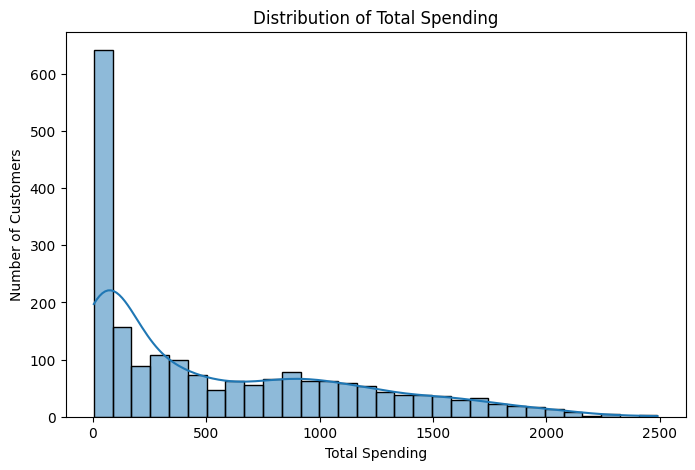

In [18]:
# Distribution check (optional, for visualization)


plt.figure(figsize=(8,5))
sns.histplot(df['MntTotal'], bins=30, kde=True)
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

## Step 4: Customer Segmentation (K-Means)
Use clustering to group customers based on RFM metrics.


### Customer Segmentation with K-Means

This section performs customer segmentation using the **K-Means clustering algorithm** based on the RFM (Recency, Frequency, Monetary) model.

**Steps:**
1. **Feature Selection** – Selecting `Recency`, `Total_Purchases`, and `MntTotal`.
2. **Scaling** – Standardizing features using `StandardScaler`.
3. **Optimal Cluster Selection** – Using the Elbow Method to determine the best number of clusters.

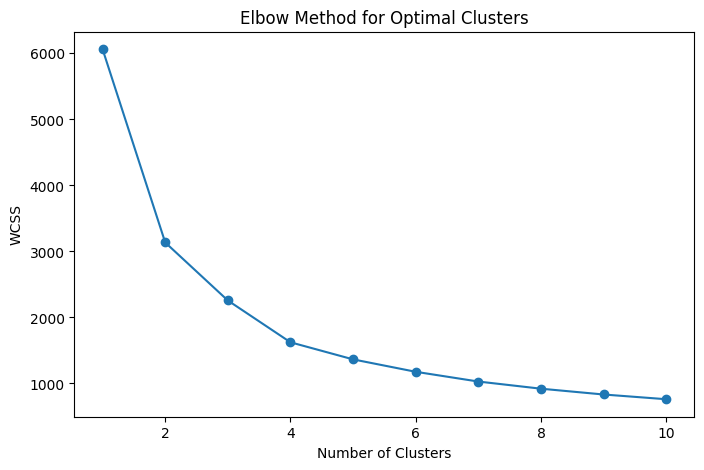

In [19]:
# 4. Customer Segmentation with K-Means

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering (RFM: Recency, Frequency, Monetary)
rfm_df = df[['Recency', 'Total_Purchases', 'MntTotal']].copy()

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



### K-Means Clustering and Visualization

After selecting the optimal `k` value from the elbow plot (here assumed as `k=4`), the dataset is clustered using K-Means.  
The centroids are transformed back to the original scale for interpretation, and the distribution of customers across clusters is displayed.  
A scatter plot visualizes the clusters based on total purchases and spending.


Cluster Centroids (Original Scale):
     Recency  Total_Purchases     MntTotal
0  73.347295         7.123909   131.575916
1  73.261905        19.294372  1110.610390
2  22.802817        19.720657  1118.107981
3  23.569643         7.146429   133.230357

Customer count per cluster:
Cluster
0    573
3    560
1    462
2    426
Name: count, dtype: int64


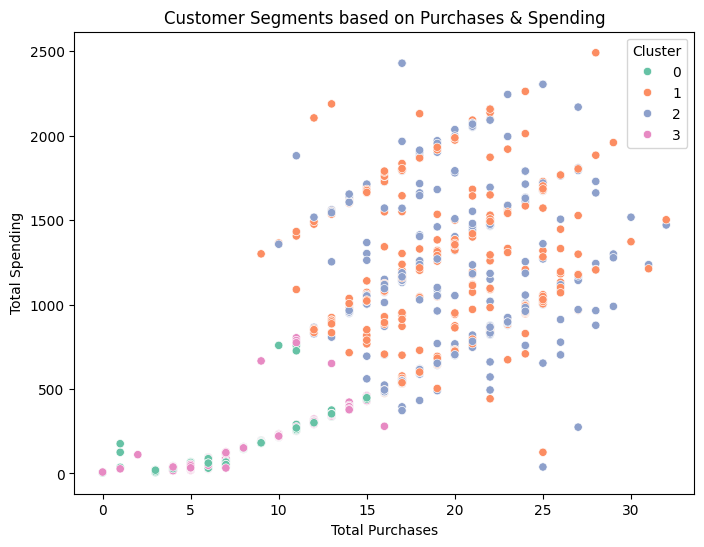

In [20]:
# Choose optimal k (manually from elbow plot, here assuming k=4 as example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Cluster centroids (in original scale)
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                         columns=rfm_df.columns)
print("\nCluster Centroids (Original Scale):")
print(centroids)

# Count of customers per cluster
print("\nCustomer count per cluster:")
print(df['Cluster'].value_counts())

# Quick visualization of clusters
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Total_Purchases', y='MntTotal', hue='Cluster', palette='Set2')
plt.title('Customer Segments based on Purchases & Spending')
plt.xlabel('Total Purchases')
plt.ylabel('Total Spending')
plt.show()


## Step 5: Visualization
Visualize the customer segments.


### Visualization of Customer Segments

This step visualizes the **distribution of customers** across different clusters obtained from K-Means segmentation.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8932\2431406553.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set2')


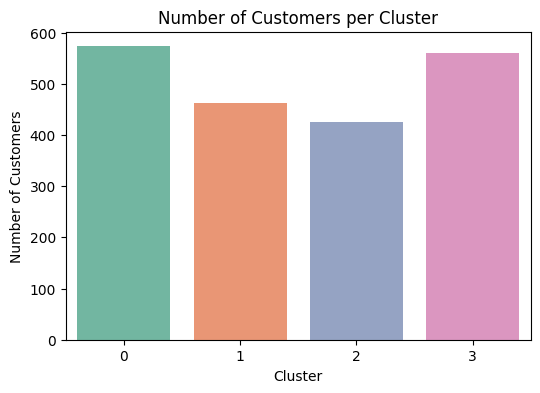

In [21]:
# 5. Visualization of Customer Segments

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cluster distribution (number of customers in each segment)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()



### Average Metrics per Cluster

This step calculates and visualizes the **average Recency, Total Purchases, and Total Spending** for each customer cluster.


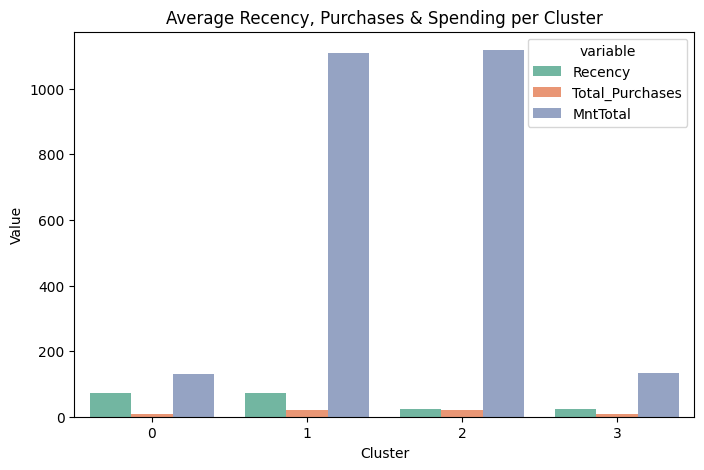

In [22]:
# 2. Average metrics per cluster
cluster_avg = df.groupby('Cluster')[['Recency', 'Total_Purchases', 'MntTotal']].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cluster_avg.melt(id_vars='Cluster'), 
            x='Cluster', y='value', hue='variable', palette='Set2')
plt.title("Average Recency, Purchases & Spending per Cluster")
plt.ylabel("Value")
plt.show()



### Scatter Plot: Purchases vs Total Spending

This plot visualizes **customer clusters** based on their total purchases and total spending, allowing quick identification of high-value segments.

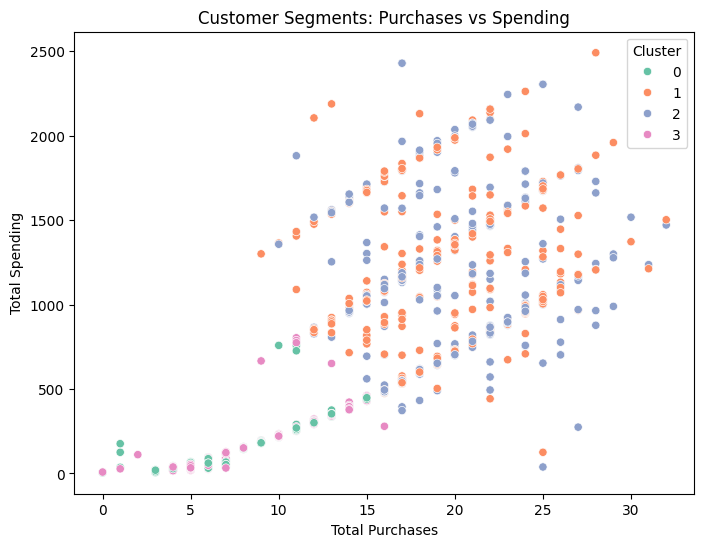

In [23]:
# 3. Scatter plot: Purchases vs Total Spending
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Total_Purchases', y='MntTotal', hue='Cluster', palette='Set2')
plt.title("Customer Segments: Purchases vs Spending")
plt.xlabel("Total Purchases")
plt.ylabel("Total Spending")
plt.show()


### Heatmap of Average Values

This heatmap displays the **average Recency, Total Purchases, and Total Spending** for each customer cluster, providing an easy-to-read comparison.

```python

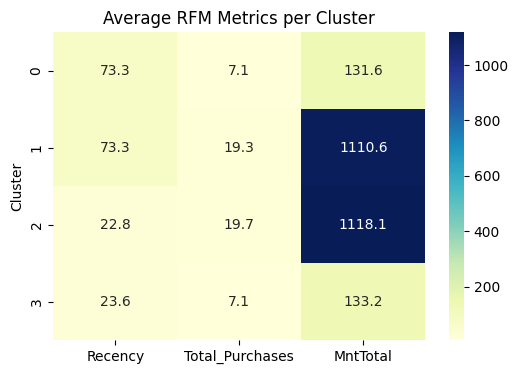

In [24]:

# 4. Heatmap of average values
plt.figure(figsize=(6,4))
sns.heatmap(cluster_avg.set_index('Cluster'), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average RFM Metrics per Cluster")
plt.show()


## Step 6: Insights & Recommendations
Analyze each cluster and provide business recommendations.


### Insights & Recommendations

This step calculates the **average Recency, Total Purchases, Total Spending, and Income** for each cluster, providing a basis for actionable insights.


In [25]:
# 6. Insights & Recommendations

# Get average values per cluster
cluster_summary = df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Total_Purchases': 'mean',
    'MntTotal': 'mean',
    'Income': 'mean'
}).reset_index()

print("Cluster Summary (Average Metrics):")
print(cluster_summary)



Cluster Summary (Average Metrics):
   Cluster    Recency  Total_Purchases     MntTotal        Income
0        0  73.347295         7.123909   131.575916  37724.710297
1        1  73.261905        19.294372  1110.610390  69352.924242
2        2  22.802817        19.720657  1118.107981  70062.061033
3        3  23.569643         7.146429   133.230357  37421.789286


### Insights Generation

This section generates **actionable insights** for each customer cluster based on their purchasing behavior and spending patterns.  
It also provides **general recommendations** for marketing strategies.


In [26]:
# Insights generation
for idx, row in cluster_summary.iterrows():
    print(f"\nCluster {int(row['Cluster'])} Insights:")
    if row['Total_Purchases'] > cluster_summary['Total_Purchases'].mean() and row['MntTotal'] > cluster_summary['MntTotal'].mean():
        print("- High-value and frequent buyers. Consider loyalty programs, VIP offers.")
    elif row['Total_Purchases'] > cluster_summary['Total_Purchases'].mean():
        print("- Frequent buyers but not spending heavily. Offer bundle deals or upselling.")
    elif row['MntTotal'] > cluster_summary['MntTotal'].mean():
        print("- High spenders but less frequent purchases. Use targeted campaigns to increase frequency.")
    else:
        print("- Low-value segment. Use discounts or awareness campaigns to increase engagement.")

# Final recommendations
print("\nGeneral Recommendations:")
print("- Personalize marketing messages based on segment preferences.")
print("- Target high-value customers with loyalty and retention offers.")
print("- Engage low-value customers with promotions and education on products.")
print("- Monitor changes in customer behavior to update segmentation regularly.")



Cluster 0 Insights:
- Low-value segment. Use discounts or awareness campaigns to increase engagement.

Cluster 1 Insights:
- High-value and frequent buyers. Consider loyalty programs, VIP offers.

Cluster 2 Insights:
- High-value and frequent buyers. Consider loyalty programs, VIP offers.

Cluster 3 Insights:
- Low-value segment. Use discounts or awareness campaigns to increase engagement.

General Recommendations:
- Personalize marketing messages based on segment preferences.
- Target high-value customers with loyalty and retention offers.
- Engage low-value customers with promotions and education on products.
- Monitor changes in customer behavior to update segmentation regularly.
